In [160]:
# Import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

!pip install geopy
from geopy.distance import geodesic

In [161]:
# Import datasets from csv files
sample = pd.read_csv('Sample_Submission.csv')

delivery = pd.read_csv('train.csv')

In [162]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11399 non-null  object 
 1   Time_taken (min)  11399 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [163]:
sample.head()

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


In [164]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [165]:
delivery.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [166]:
# Replace missing values
delivery = delivery.replace('NaN', float(np.nan), regex=True)

In [167]:
# Check for any duplicate ID values
delivery['ID'].value_counts().head()

0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
Name: ID, dtype: int64

In [168]:
delivery['multiple_deliveries'].value_counts()

# Are values of zero valid completed orders? Hard to tell. Can I just delete this row if not relevant?

1    28159
0    14095
2     1985
3      361
Name: multiple_deliveries, dtype: int64

In [171]:
delivery['Festival'].value_counts()

No      44469
Yes       896
Name: Festival, dtype: int64

In [172]:
# Delete Vehicle_condition column: unclear values
del delivery['Vehicle_condition']
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Type_of_order   

In [173]:
del delivery['Festival']
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Type_of_order   

In [177]:
delivery['multiple_deliveries'].value_counts()

1    28159
0    14095
2     1985
3      361
Name: multiple_deliveries, dtype: int64

Column descriptions:

- ID: unique identifier of the individual delivery orders. 
- Delivery_person_ID: unique identifier of the person completing the delivery route. 
- Delivery_person_Age: age of the person completing the delivery route. 
- Delivery_person_Ratings: rating between 1 and 5 (1=worst, 5=best) of the person completing the delivery route. 

- Restaurant_latitude: north-south coordinate of the restaurant location as the delivery starting point. 
- Restaurant_longitude: east-west coordinate of the restaurant location as the delivery starting point. 
- Delivery_latitude: north-south coordinate of the customer location as the delivery end point. 
- Delivery_longitude: east-west coordinate of the customer location as the delivery end point. 

- Order_Date: the date that the order was placed on in dd-mm-yyyy format. 
- Time_Orderd: the time of day that the order was placed. 
- Time_Order_Picked: the time of day that the order was picked up from restaurant supplier. 

- Weatherconditions: the state of the weather at the time the order was placed. 
- Road_traffic_density: how dense the traffic conditions were during delivery period. 
- Vehicle_condition: unclear int value, does not seem applicable -- column deleted. 
- Type_of_order: 

In [178]:
# Tidy the Weatherconditions column by removing redundant 'conditions' string 
# Tidy the Time_taken(min) column by removing redundant '(min)' string

delivery['Weatherconditions'] = delivery['Weatherconditions'].str.replace('conditions', '')
delivery['Time_taken(min)'] = delivery['Time_taken(min)'].str.replace('[(min)]', '')
delivery.head()

/var/folders/x1/k6x2x2c9677_n0slz_pq1p5r0000gn/T/ipykernel_68941/4191341627.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  delivery['Time_taken(min)'] = delivery['Time_taken(min)'].str.replace('[(min)]', '')


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,Snack,motorcycle,0,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,Snack,scooter,1,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,Drinks,motorcycle,1,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,Buffet,motorcycle,1,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,Snack,scooter,1,Metropolitian,30


In [179]:
delivery.shape

(45593, 18)

In [188]:
delivery['Delivery_person_Age'].value_counts()

35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
29    2191
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: Delivery_person_Age, dtype: int64

In [196]:
delivery.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [198]:
delivery['Time_taken(min)'].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

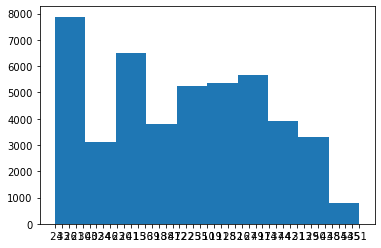

In [206]:
plt.hist(delivery['Time_taken(min)'], bins=10)

In [195]:
sample.describe()

,Time_taken (min)
count,11399.000000
mean,26.234647
std,8.408526
min,10.394167
25%,20.143333
50%,24.527500
75%,32.139583
max,52.315833
